# **Reinforcement Learning Q-learning Algorithm Assignment**
## **Name: Jasser Abdelfattah**
## **UH ID: 21033101**

## Introduction
In this project, we implement a Q-learning algorithm to train agents in a grid environment. The goal is to navigate the agents to a specified goal position while avoiding obstacles.

## Import Libraries
First, we import the necessary libraries for our project, including numpy for numerical operations, random for random number generation, csv for handling CSV files, and matplotlib for plotting.

In [107]:
import numpy as np
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Define Environment Constants
We define the constants for our grid environment, such as the grid size, goal position, possible actions, and rewards.

In [108]:
# Environment constants
GRID_SIZE = 10 # 10x10 grid
OBSTACLES = [(2, 2), (2, 3), (3, 2), (4, 5)]  # Obstacles in the grid
GOAL_POSITION = (9, 9) # Goal position
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT'] # Possible actions
REWARD_GOAL = 20 # Reward for reaching the goal
REWARD_MOVE = -1 # Reward for moving

## Define Q-Learning Agent Class Constants
We define the constants for the Q-learning agent, such as the learning rate, discount factor, and epsilon for the epsilon-greedy policy.

In [109]:
# Q-learning parameters
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Epsilon for epsilon-greedy

## Define the Q-Learning Agent Class

We create a class for the Q-learning agent. This class includes methods to initialize the Q-table, choose actions based on the epsilon-greedy policy, and update the Q-table based on the agent's experience.

### Q-Learning Algorithm

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. The agent learns the optimal policy by updating the Q-values using the Bellman equation:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
$$

Where:
- $Q(s, a)$ is the Q-value for state $s$ and action $a$.
- $\alpha$ is the learning rate.
- $r$ is the reward received after taking action $a$ in state $s$.
- $\gamma$ is the discount factor.
- $s'$ is the next state.
- $\max_{a'} Q(s', a')$ is the maximum Q-value for the next state $s'$ over all possible actions $a'$.

In [110]:
class QLearningAgent:
    """
    QLearningAgent is an agent that learns to navigate a grid environment using the Q-learning algorithm.
    Attributes:
        name (str): The name of the agent.
        q_table (np.ndarray): A 3D numpy array representing the Q-table, which stores the Q-values for each state-action pair.
        position (tuple): The current position of the agent in the grid.
        total_reward (float): The total reward accumulated by the agent.
    Methods:
        __init__(name):
            Initializes the QLearningAgent with a name, an empty Q-table, a starting position, and a total reward of 0.
        reset():
            Resets the agent to the starting position and resets the total reward to 0.
        choose_action():
            Selects an action using the epsilon-greedy policy. With probability EPSILON, a random action is chosen (exploration),
            otherwise the action with the highest Q-value for the current state is chosen (exploitation).
        update_q_table(action, reward, next_position):
            Updates the Q-table based on the Q-learning update rule. The Q-value for the current state-action pair is updated
            using the received reward and the maximum Q-value for the next state. The agent's position and total reward are also updated.
    """

    def __init__(self, name):
        self.name = name
        self.q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))  # Q-table
        self.position = (0, 0)  # Start position
        self.total_reward = 0

    def reset(self):
        self.position = (0, 0)
        self.total_reward = 0

    def choose_action(self):
        if random.uniform(0, 1) < EPSILON:
            return random.choice(ACTIONS)  # Explore
        else:
            state = self.position
            action_values = self.q_table[state[0], state[1]]
            return ACTIONS[np.argmax(action_values)]  # Exploit

    def update_q_table(self, action, reward, next_position):
        x, y = self.position
        next_x, next_y = next_position
        action_index = ACTIONS.index(action)
        best_next_action = np.max(self.q_table[next_x, next_y])

        self.q_table[x, y, action_index] += ALPHA * (
            reward + GAMMA * best_next_action - self.q_table[x, y, action_index]
        )
        self.total_reward += reward
        self.position = next_position

## Define the Grid Environment Class
We create a class to represent the grid environment. This class includes methods to initialize the grid, check for valid moves, and apply actions to the agent.

In [111]:
class GridEnvironment:
    """
    A class to represent a grid-based environment for reinforcement learning.
    Attributes
    ----------
    grid_size : int
        The size of the grid (assumed to be square).
    goal : tuple
        The coordinates of the goal position.
    obstacles : list of tuples
        The coordinates of the obstacle positions.
    Methods
    -------
    __init__():
        Initializes the grid environment with the specified grid size, goal position, and obstacles.
    is_valid_move(position):
        Checks if a given position is a valid move within the grid.
    step(agent, action):
        Applies the action to the agent's current position and returns the next state and reward.
    """

    def __init__(self):
        self.grid_size = GRID_SIZE
        self.goal = GOAL_POSITION
        self.obstacles = OBSTACLES

    def is_valid_move(self, position):
        x, y = position
        if (
            (0 <= x < self.grid_size)
            and (0 <= y < self.grid_size)
            and (position not in self.obstacles)
        ):
            return True
        return False

    def step(self, agent, action):
        x, y = agent.position
        if action == "UP":
            next_position = (x - 1, y)
        elif action == "DOWN":
            next_position = (x + 1, y)
        elif action == "LEFT":
            next_position = (x, y - 1)
        elif action == "RIGHT":
            next_position = (x, y + 1)
        else:
            next_position = (x, y)

        # Check if the move is valid
        if not self.is_valid_move(next_position):
            next_position = (x, y)  # Stay in place if invalid

        # Reward logic
        if next_position == self.goal:
            reward = REWARD_GOAL
        else:
            reward = REWARD_MOVE

        return next_position, reward

## Run Single-Agent Simulation
We define a function to run the simulation for a single agent. This function initializes the environment and agent, runs the agent for a specified number of episodes, and records the results.


In [112]:
# Function to run single-agent simulation
def run_single_agent(episodes):
    """
    Runs a single Q-learning agent in a grid environment for a specified number of episodes.
    Args:
        episodes (int): The number of episodes to run the agent.
    Returns:
        None
    The function initializes the grid environment and the Q-learning agent, then runs the agent
    for the specified number of episodes. During each episode, the agent interacts with the environment,
    chooses actions, receives rewards, and updates its Q-table. The total reward and episode length for
    each episode are recorded and written to a CSV file named 'single_agent_results.csv'.
    After all episodes are completed, the function plots the learning curve showing the total reward
    per episode.

    """
    env = GridEnvironment()
    agent = QLearningAgent("SingleAgent")
    episode_rewards = []
    episode_lengths = []

    with open("single_agent_results.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Episode", "Total Reward", "Episode Length"])

        for episode in range(1, episodes + 1):
            agent.reset()
            steps = 0
            done = False

            while not done:
                action = agent.choose_action()
                next_position, reward = env.step(agent, action)
                agent.update_q_table(action, reward, next_position)
                steps += 1
                if next_position == GOAL_POSITION:
                    done = True

            episode_rewards.append(agent.total_reward)
            episode_lengths.append(steps)
            writer.writerow([episode, agent.total_reward, steps])

    # Plot learning curve
    plt.plot(range(episodes), episode_rewards, label="Single Agent Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Single-Agent Learning Curve for Episodes {}".format(episodes))
    plt.legend()
    plt.show()

## Run Multi-Agent Simulation
We define a function to run the simulation for multiple agents. This function initializes the environment and multiple agents, runs the agents for a specified number of episodes, and records the results.

In [113]:
# Function to run multi-agent simulation
def run_multi_agent(episodes):
    """
    Run a multi-agent reinforcement learning simulation.
    Parameters:
    episodes (int): The number of episodes to run the simulation.
    This function initializes a grid environment and multiple Q-learning agents.
    It runs the simulation for the specified number of episodes, where each agent
    interacts with the environment, chooses actions, and updates its Q-table based
    on the received rewards. The results of each episode, including the agent's
    position and total reward, are written to a CSV file. Additionally, a learning
    curve showing the total reward per episode is plotted.
    The CSV file 'multi_agent_results.csv' will contain the following columns:
    - Episode: The episode number.
    - Agent: The name of the agent.
    - Position: The final position of the agent.
    - Total Reward: The total reward accumulated by the agent in the episode.
    The learning curve plot will display the total reward accumulated by all agents
    over the episodes.
    """
    env = GridEnvironment()
    agents = [QLearningAgent(f"Agent_{i}") for i in range(4)]
    episode_rewards = []

    with open("multi_agent_results.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Episode", "Agent", "Position", "Total Reward"])

        for episode in range(1, episodes + 1):
            for agent in agents:
                agent.reset()

            done = [False] * 4
            while not all(done):
                for i, agent in enumerate(agents):
                    if done[i]:
                        continue
                    action = agent.choose_action()
                    next_position, reward = env.step(agent, action)
                    agent.update_q_table(action, reward, next_position)
                    if next_position == GOAL_POSITION:
                        done[i] = True

            for agent in agents:
                writer.writerow(
                    [episode, agent.name, agent.position, agent.total_reward]
                )
            episode_rewards.append(sum([agent.total_reward for agent in agents]))

    # Plot learning curve
    plt.plot(range(episodes), episode_rewards, label="Multi-Agent Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Multi-Agent Learning Curve for Episodes {}".format(episodes))
    plt.legend()
    plt.show()

## Exploratory data analysis


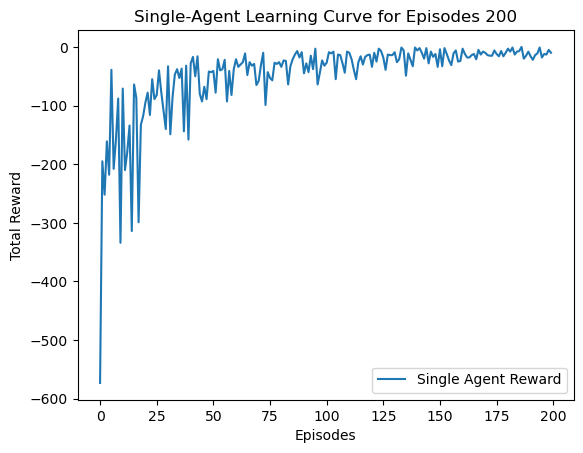

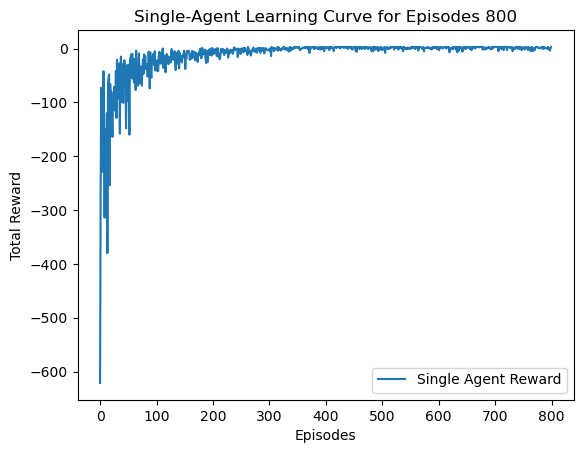

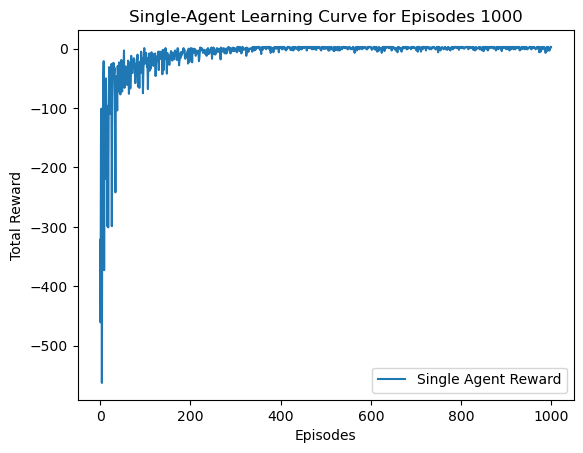

In [114]:
run_single_agent(200)
run_single_agent(800)
run_single_agent(1000)

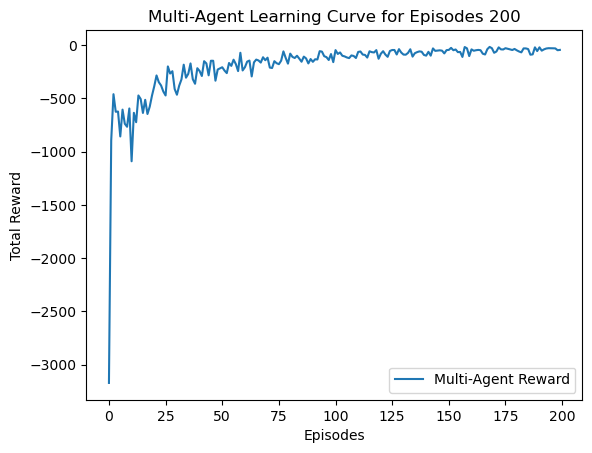

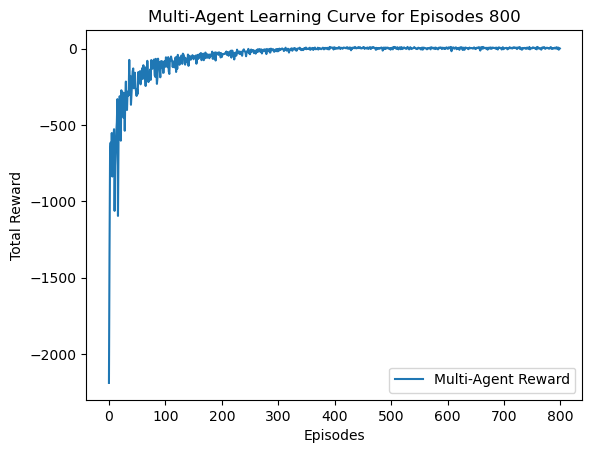

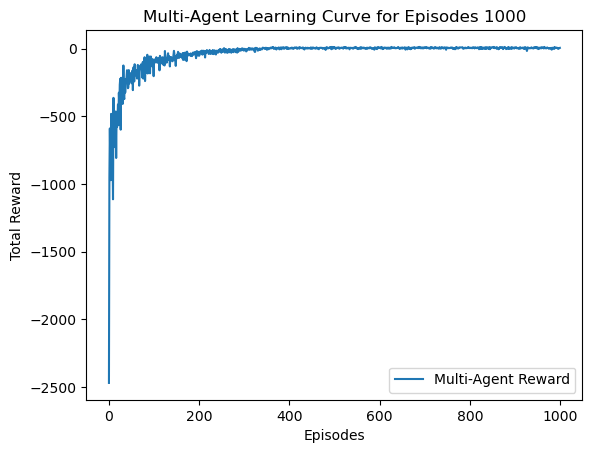

In [115]:
run_multi_agent(200)
run_multi_agent(800)
run_multi_agent(1000)

## Reading Output Tables

In [116]:
df_s = pd.read_csv("single_agent_results.csv")
pd.concat([df_s.head(), df_s.tail()])

,Episode,Total Reward,Episode Length
0,1,-322,343
1,2,-461,482
2,3,-149,170
3,4,-101,122
4,5,-563,584
995,996,-2,23
996,997,-3,24
997,998,2,19
998,999,1,20
999,1000,3,18


In [117]:
df_m = pd.read_csv("multi_agent_results.csv")
pd.concat([df_m.head(), df_m.tail()])

,Episode,Agent,Position,Total Reward
0,1,Agent_0,"(9, 9)",-615
1,1,Agent_1,"(9, 9)",-603
2,1,Agent_2,"(9, 9)",-649
3,1,Agent_3,"(9, 9)",-602
4,2,Agent_0,"(9, 9)",-139
3995,999,Agent_3,"(9, 9)",3
3996,1000,Agent_0,"(9, 9)",3
3997,1000,Agent_1,"(9, 9)",-1
3998,1000,Agent_2,"(9, 9)",0
3999,1000,Agent_3,"(9, 9)",3


## Single Agent EDA

### Total Reward Over Episodes (Single Agent)

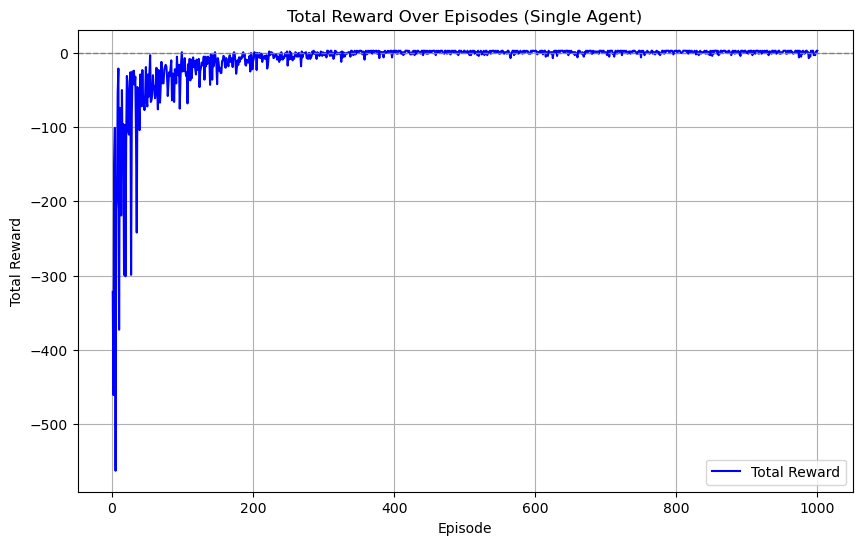

In [118]:
# Plot total reward over episodes
plt.figure(figsize=(10, 6))
plt.plot(df_s['Episode'], df_s['Total Reward'], label='Total Reward', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward Over Episodes (Single Agent)')
plt.legend()
plt.grid(True)
plt.show()

### Episode Length Over Episodes (Single Agent)

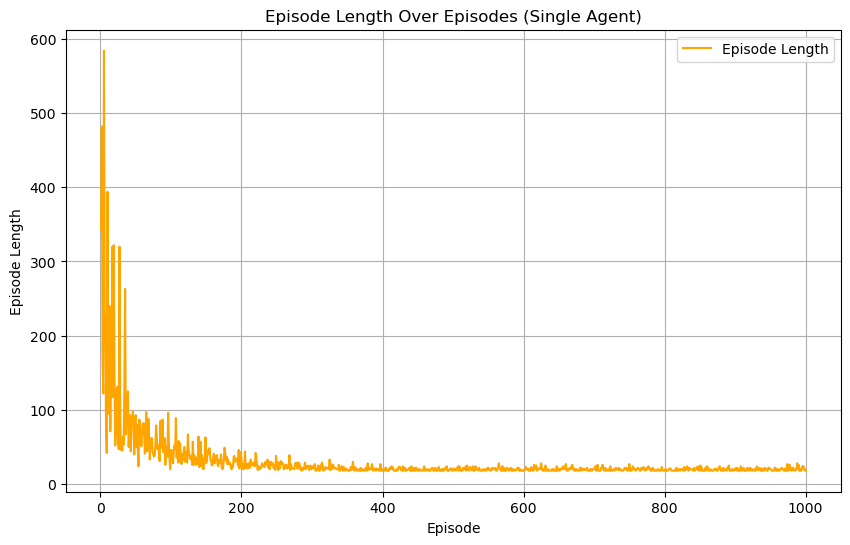

In [119]:
# Plot episode length over episodes
plt.figure(figsize=(10, 6))
plt.plot(df_s['Episode'], df_s['Episode Length'], label='Episode Length', color='orange')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Over Episodes (Single Agent)')
plt.legend()
plt.grid(True)
plt.show()

### Distribution of Total Rewards (Single Agent)

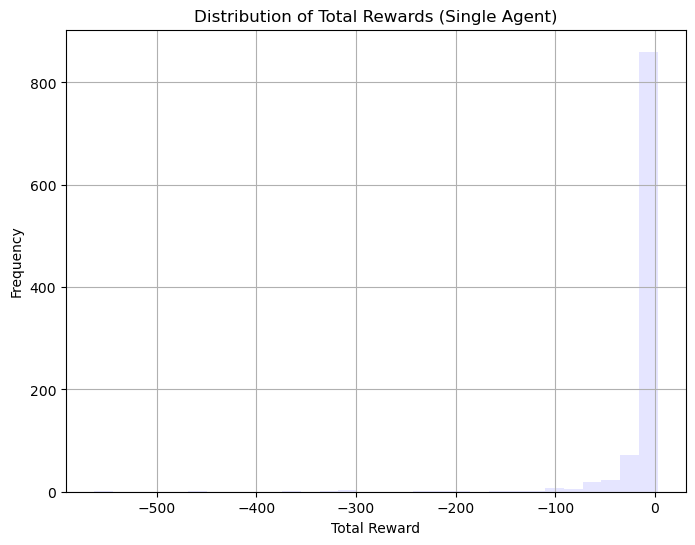

In [120]:
# Histogram of total rewards
plt.figure(figsize=(8, 6))
plt.hist(df_s['Total Reward'], bins=30, color='blue', alpha=ALPHA)
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rewards (Single Agent)')
plt.grid(True)
plt.show()

### Distribution of Episode Lengths (Single Agent)

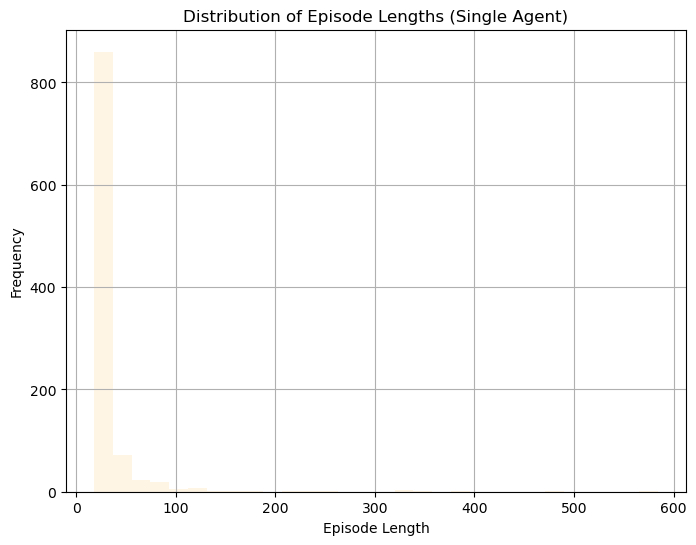

In [121]:
# Histogram of episode lengths
plt.figure(figsize=(8, 6))
plt.hist(df_s['Episode Length'], bins=30, color='orange', alpha=ALPHA)
plt.xlabel('Episode Length')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Lengths (Single Agent)')
plt.grid(True)
plt.show()

## Multi-Agent EDA

### Average Total Reward Per Agent (Multi-Agent)

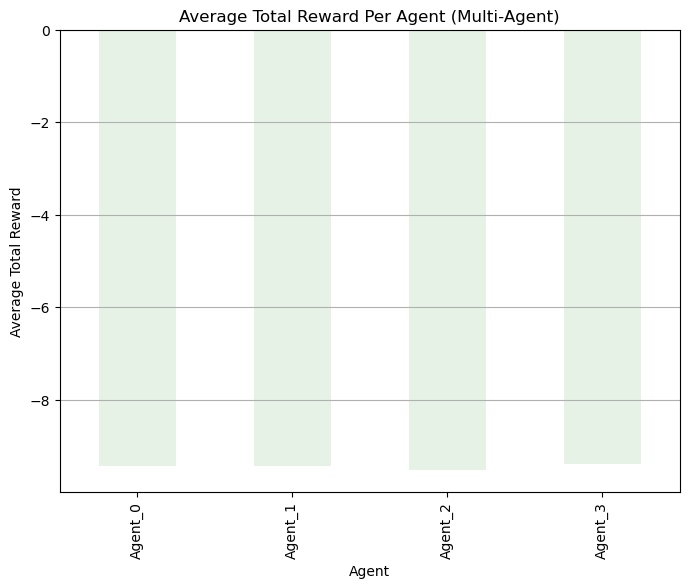

In [122]:
# Group by agents and calculate mean reward
agent_rewards = df_m.groupby('Agent')['Total Reward'].mean()

# Plot average reward per agent
agent_rewards.plot(kind='bar', figsize=(8, 6), color='green', alpha=ALPHA)
plt.xlabel('Agent')
plt.ylabel('Average Total Reward')
plt.title('Average Total Reward Per Agent (Multi-Agent)')
plt.grid(axis='y')
plt.show()

### Total Reward Over Episodes (Multi-Agent)

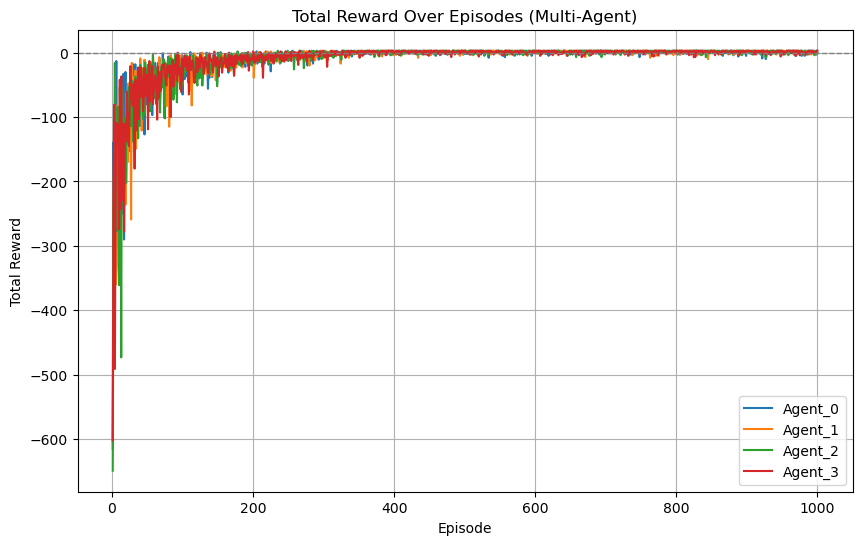

In [123]:
# Line plot of rewards for each agent
plt.figure(figsize=(10, 6))
for agent in df_m['Agent'].unique():
    agent_data = df_m[df_m['Agent'] == agent]
    plt.plot(agent_data['Episode'], agent_data['Total Reward'], label=agent)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward Over Episodes (Multi-Agent)')
plt.legend()
plt.grid(True)
plt.show()

### Position Frequency (Multi-Agent)

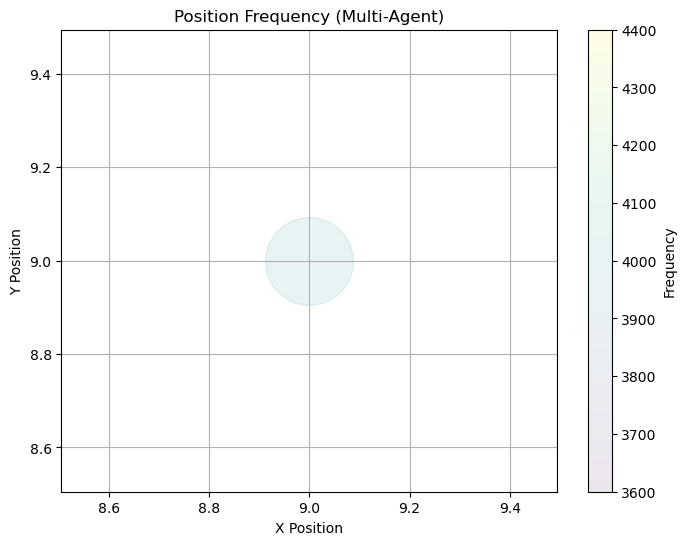

In [124]:
from collections import Counter

# Count position frequencies
positions = df_m['Position']
position_counts = Counter(positions)

# Convert to x, y arrays
x = [eval(pos)[0] for pos in position_counts.keys()]
y = [eval(pos)[1] for pos in position_counts.keys()]
freq = list(position_counts.values())

# Scatter plot of position frequencies
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=freq, alpha=ALPHA, c=freq, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Position Frequency (Multi-Agent)')
plt.grid(True)
plt.show()

### Distribution of Total Rewards (Multi-Agent)

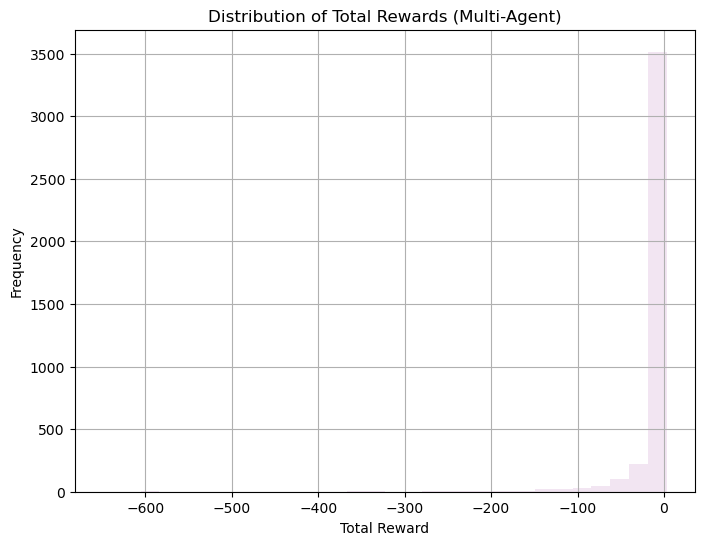

In [125]:
# Histogram of rewards across agents
plt.figure(figsize=(8, 6))
plt.hist(df_m['Total Reward'], bins=30, color='purple', alpha=ALPHA)
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rewards (Multi-Agent)')
plt.grid(True)
plt.show()